<a href="https://colab.research.google.com/github/Fredericobianchessi/Trabalhoindividual/blob/main/Main_Univariada_ps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão da demanda de passagens aéreas para Porto Seguro
Objetivo do trabalho: Desenvolver um modelo de regressão capaz de prever a demanda de passagens aéreas para vôos fretados por uma operadora de turismo com destino à Porto Seguro, Bahia, saindo de Porto Alegre.

## Dicionário de dados
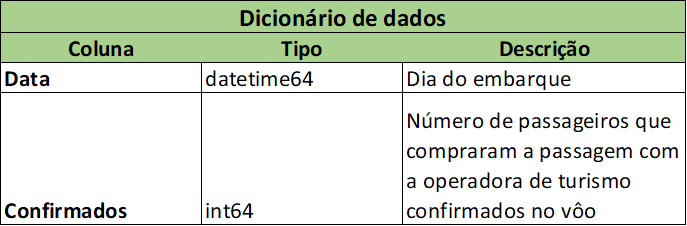

## Importação da bibliotecas

In [95]:
!pip install --pre pycaret
from pycaret.time_series import *
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importação da base de dados

In [96]:
df = pd.read_excel('https://raw.githubusercontent.com/Fredericobianchessi/Trabalhoindividual/main/Base_analise_voos_colab.xlsx', sheet_name= "univariate")

## Apresentação da base de dados

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         1826 non-null   datetime64[ns]
 1   Confirmados  1826 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 28.7 KB


In [98]:
df.head()

,Data,Confirmados
0,2015-01-01,0
1,2015-01-02,0
2,2015-01-03,156
3,2015-01-04,0
4,2015-01-05,0


In [99]:
df.tail()

,Data,Confirmados
1821,2019-12-27,0
1822,2019-12-28,342
1823,2019-12-29,0
1824,2019-12-30,0
1825,2019-12-31,0


In [100]:
df.describe()

,Confirmados
count,1826.000000
mean,32.786966
std,86.779513
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,444.000000


## Preparo da base de dados

In [101]:
df.set_index("Data", drop= True, inplace= True)

<Axes: xlabel='Data'>

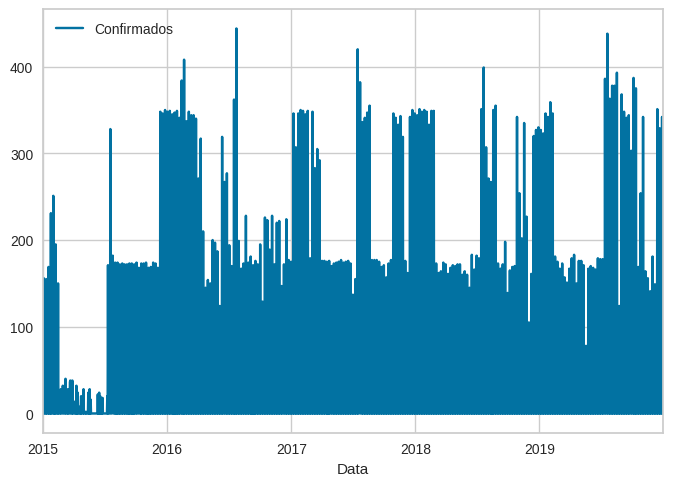

In [102]:
df.plot()

## Setup do Pycaret

In [103]:
s = setup(df, fh= 90, fold= 3, session_id=123)

,Description,Value
0,session_id,123
1,Target,Confirmados
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1826, 1)"
5,Transformed data shape,"(1826, 1)"
6,Transformed train set shape,"(1736, 1)"
7,Transformed test set shape,"(90, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


## Apresentação da série histórica

In [62]:
s.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,1826.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,32.786966
3,Summary,Statistics,Transformed,Median,,0.0
4,Summary,Statistics,Transformed,Standard Deviation,,86.779513
5,Summary,Statistics,Transformed,Variance,,7530.683907
6,Summary,Statistics,Transformed,Kurtosis,,6.608319
7,Summary,Statistics,Transformed,Skewness,,2.744853
8,Summary,Statistics,Transformed,# Distinct Values,,139.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",5288.950193


In [63]:
s.plot_model(plot= 'cv')

In [64]:
s.plot_model(plot= "decomp_classical")

In [65]:
s.plot_model(plot = 'acf')

In [66]:
s.plot_model(plot = 'diagnostics')

## Comparação de modelos

In [67]:
best = s.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.8050,1.3131,12.1638,34.1248,1186453544221243.2500,1.7648,0.8554,5.6133
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,2.0189,1.5730,13.7095,41.1061,26143368229293.1602,1.7704,0.7976,2.3467
snaive,Seasonal Naive Forecaster,2.0192,1.5739,13.7111,41.1291,0.0657,0.0742,0.7973,0.0400
arima,ARIMA,2.0607,1.5771,14.0034,41.2168,1242825924402626.2500,1.7704,0.7963,0.2733
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,2.0640,1.5694,14.0217,41.0142,973100147981788.3750,1.7710,0.7978,2.2167
exp_smooth,Exponential Smoothing,2.0875,1.5717,14.1860,41.0674,1590775220855771.0000,1.7711,0.7982,1.1533
ets,ETS,2.0903,1.5775,14.2064,41.2247,1560335607485881.7500,1.7712,0.7964,0.3667
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,2.3602,1.4679,16.0101,38.2815,11906465869168250.0000,1.7708,0.8246,5.0800
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,2.5927,1.3662,17.6557,35.6391,23038090199943792.0000,1.7632,0.8470,2.3267
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,2.6042,1.3671,17.7293,35.6627,23333403186838652.0000,1.7632,0.8465,2.2833


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

## Seleção do melhor modelo

In [68]:
print(best)

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [7, 6, 5,
                                                                        4, 3, 2,
                                                                        1]},
                                                   n_jobs=1)],
                    regressor=RandomForestRegressor(n_jobs=-1,
                                                    random_state=123),
                    sp=7, window_length=7)


In [70]:
best = create_model(best)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-01-05,1.0203,0.7617,7.2204,20.3345,2256591824314428.5000,1.7633,0.9463
1,2019-04-05,0.3225,0.3829,2.2085,10.0585,859932878943933.0000,1.7252,0.9707
2,2019-07-04,4.0723,2.7946,27.0625,71.9815,442835929405368.2500,1.8058,0.6492
Mean,NaT,1.8050,1.3131,12.1638,34.1248,1186453544221243.2500,1.7648,0.8554
SD,NaT,1.6283,1.0589,10.7318,27.0955,775624230418826.1250,0.0329,0.1462


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [108]:
s.plot_model(best, plot = 'forecast', data_kwargs = {'fh': 90})

In [71]:
final_best = finalize_model(best)

In [72]:
save_model(final_best, 'my_best_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [7,
                                                                                                                                                                                                         6,
                                                                                                                                                                                                         5,
                          

In [73]:
loaded_model = load_model('my_best_model')

Transformation Pipeline and Model Successfully Loaded


## Previsão da demanda dos próximos 90 dias

In [105]:
predictions = predict_model(loaded_model, fh = 90)

In [106]:
print(predictions)

              y_pred
2020-01-01   -3.3579
2020-01-02    0.1099
2020-01-03    0.0026
2020-01-04  282.3519
2020-01-05    9.3614
...              ...
2020-03-26   32.4189
2020-03-27    5.5078
2020-03-28  225.5509
2020-03-29    8.6084
2020-03-30    4.9673

[90 rows x 1 columns]


## Tentativa de análise com frequência mensal
Visando melhorar os resultdos da previsão, foi feita a contrução de um modelo que utiliza as mesma informações, mas em frequência mensal.

A avaliação breve do modelo com frequencia mensal é que para obter bons resultados será necessário coletar mais dados, para que haja uma amostra de dados maior. 

In [75]:
df_mensal = df.resample('M').sum()

In [76]:
df_mensal.describe()

,Confirmados
count,60.000000
mean,997.816667
std,370.302052
min,70.000000
25%,802.250000
50%,982.500000
75%,1285.000000
max,1782.000000


In [77]:
df_mensal.head()

,Confirmados
Data,
2015-01-31,982
2015-02-28,543
2015-03-31,266
2015-04-30,130
2015-05-31,70


<Axes: xlabel='Data'>

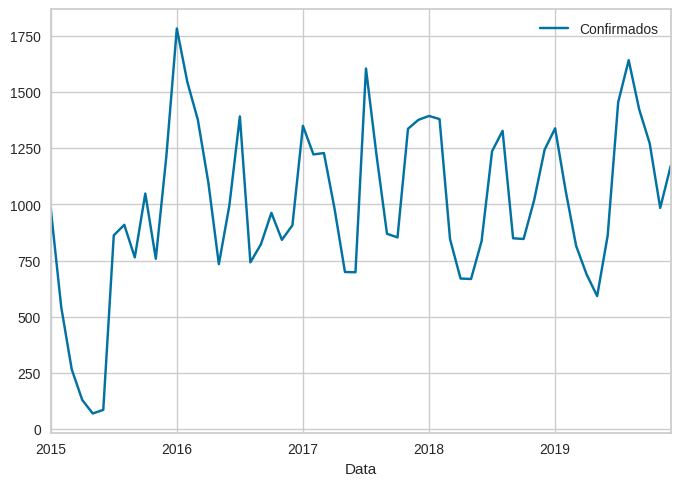

In [78]:
df_mensal.plot()

In [83]:
s_mensal = setup(df_mensal, fold= 5, fh= 6, session_id=123)

,Description,Value
0,session_id,123
1,Target,Confirmados
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(60, 1)"
5,Transformed data shape,"(60, 1)"
6,Transformed train set shape,"(54, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [84]:
best_mensal = s_mensal.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
croston,Croston,1.0089,0.8732,263.3461,290.8773,0.2721,0.2582,-0.3068,0.0260
grand_means,Grand Means Forecaster,1.0127,0.9115,264.1692,303.1949,0.2509,0.2600,-0.4538,0.0580
auto_arima,Auto ARIMA,1.0182,0.9252,265.3608,306.7609,0.2585,0.2642,-0.5695,0.7000
arima,ARIMA,1.0325,0.9377,268.7476,310.8777,0.2626,0.2671,-0.6243,0.1820
polytrend,Polynomial Trend Forecaster,1.1494,1.0786,300.9144,361.5227,0.3704,0.2843,-1.0406,0.0400
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.1523,1.0380,300.7491,345.9692,0.3287,0.2920,-0.8373,0.2760
par_cds_dt,Passive Aggressive w/ Cond. Deseasonalize & Detrending,1.1915,1.1205,311.6898,375.0651,0.3785,0.2936,-1.1628,0.1740
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.2077,1.1095,315.3457,371.4360,0.3855,0.2950,-1.2343,0.2240
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.2210,1.1050,319.0530,369.5262,0.3734,0.3030,-1.0892,0.3100
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.2256,1.1067,320.2119,370.0236,0.3730,0.3044,-1.0929,0.2440


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [85]:
best_mensal = create_model(best_mensal)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2016-12,0.9018,0.7981,245.1832,268.2332,0.2491,0.2471,-0.0797
1,2017-06,1.2307,1.1350,312.2502,362.0361,0.2371,0.2704,-0.7772
2,2017-12,1.1708,0.9349,319.0574,326.8292,0.3738,0.3227,-0.1427
3,2018-06,0.7297,0.6223,185.9548,208.9225,0.1673,0.1740,-0.1711
4,2018-12,1.0114,0.8755,254.2848,288.3654,0.3333,0.2767,-0.3633
Mean,NaT,1.0089,0.8732,263.3461,290.8773,0.2721,0.2582,-0.3068
SD,NaT,0.1815,0.1679,48.7786,52.1379,0.0733,0.0487,0.2535


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [86]:
plot_model(best_mensal)